In [195]:
import pickle
import torch
from torch import nn
import torch.nn.functional as F
import copy
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
device = "cuda" if torch.cuda.is_available() else "cpu"
import time
import matplotlib.pyplot as plt

In [196]:
def train_model(model, criterion, optimizer, scheduler, n_epochs = 25):
    since = time.time()
    
    best_model_weights = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    for epoch in range(n_epochs):
        print(f'Epoch {epoch}/{n_epochs - 1}')
        print('-'*10)
    
        for phase in ['train','val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    inputs = torch.permute(inputs, (0,3,1,2))
                    labels = labels.to(device)

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        conv0 = nn.Conv2d(8, 3, 1)
                        inputs = conv0(inputs)
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            optimizer.zero_grad()
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                    phase, epoch_loss, epoch_acc))

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())

            print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

        
    

In [198]:
with open('training_data.pickle', 'rb') as handle:
    training_data = pickle.load(handle)

with open('test_data.pickle', 'rb') as handle:
    test_data = pickle.load(handle)
    
    
dataset_sizes = {'train': len(training_data), 'val': len(test_data)}

    
train_loader = torch.utils.data.DataLoader(training_data, shuffle=True, batch_size=16)
test_loader = torch.utils.data.DataLoader(training_data, shuffle=True, batch_size=16)

dataloaders = {'train': train_loader, 'val': test_loader}


In [199]:
dataset_sizes

{'train': 492, 'val': 243}

In [200]:
model = models.resnet18(pretrained = True)
        
n_features = model.fc.in_features
model.fc = nn.Linear(n_features, out_features= 2)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size = 7, gamma = 0.1)

model = train_model(model, criterion, optimizer, step_lr_scheduler, n_epochs = 20) 


Epoch 0/19
----------
train Loss: 0.6778 Acc: 0.6341
val Loss: 1.6179 Acc: 1.2016

train Loss: 0.5753 Acc: 0.7073
val Loss: 2.1337 Acc: 1.2675

Epoch 1/19
----------
train Loss: 0.6104 Acc: 0.7276
val Loss: 1.3055 Acc: 1.4239

train Loss: 0.5069 Acc: 0.7703
val Loss: 1.8731 Acc: 1.2881

Epoch 2/19
----------
train Loss: 0.5668 Acc: 0.7337
val Loss: 1.8889 Acc: 1.2963

train Loss: 0.4980 Acc: 0.7683
val Loss: 2.3374 Acc: 1.2963

Epoch 3/19
----------
train Loss: 0.5822 Acc: 0.7541
val Loss: 2.5776 Acc: 1.2963

train Loss: 0.4191 Acc: 0.7967
val Loss: 2.0061 Acc: 1.3580

Epoch 4/19
----------
train Loss: 0.3737 Acc: 0.8110
val Loss: 2.1237 Acc: 1.2922

train Loss: 0.3780 Acc: 0.7927
val Loss: 2.4419 Acc: 1.3374

Epoch 5/19
----------
train Loss: 0.3978 Acc: 0.8150
val Loss: 2.6227 Acc: 1.2881

train Loss: 0.3723 Acc: 0.8232
val Loss: 2.0296 Acc: 1.3992

Epoch 6/19
----------
train Loss: 0.4031 Acc: 0.7967
val Loss: 2.2951 Acc: 1.3333

train Loss: 0.3703 Acc: 0.8252
val Loss: 2.3750 Acc: 

In [20]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

0


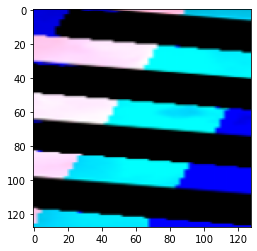

In [194]:
example = next(iter(test_loader))[0][[0]]
conv0 = nn.Conv2d(8, 3, 1)
inputs = torch.permute(example, (0,3,1,2))
inputs = conv0(inputs)
outputs = model(inputs)
prediction = outputs.data.cpu().numpy().argmax()
print(prediction)
plt.imshow(example[0,:,:,0:3])